# Atención a clientes 

# Diccionario de datos

* `id_llamada` - Contiene el identificador de la llamada.
* `fecha` - Fecha en la que se realizó la llamada.
* `asesor` - Nombre del asesor que atendió la llamada.
* `area` - Área en donde fue recibida la llamada.
* `atendida` - Indica si la llamada fue atendida o no.
* `resuelto` - Indica si se resolvió el problema por el cual el cliente llamó (0 = no, 1 = sí).
* `tiempo_respuesta` - Tiempo que tardó el asesor en contestar (en segundos).
* `duracion_llamada` - Duración total de la llamada (en minutos con segundos).
* `duracion_llamada_asistida` - Tiempo de la llamada con asistencia del asesor (en segundos).
* `indice_satisfaccion` - Índice de satisfacción de 1 a 5 (donde 1 es pésimo y 5 es excelente).

In [1]:
# Librerias utilizadas
import datetime as dt 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

In [2]:
# Cargar el dataset 
servicio = pd.read_excel("./datasets/datos_de_servicio.xlsx")

In [3]:
# Funcion para obtener información general del dataset
def leer_datos(df):
    print(df.head())
    print(df.info())
    print(df.describe())

In [4]:
leer_datos(servicio)

  Id Llamada      Fecha   Asistente           Área Respondido Resuelto (S/N)  \
0     ID0001 2023-03-22     Juan D.         Ventas         SÍ              S   
1     ID0002 2023-03-17  Marcelo F.       RECLAMOS         SÍ              N   
2     ID0003 2023-03-18  Leandro C.         Ventas         SÍ              S   
3     ID0004 2023-03-09  Leandro C.         Ventas         SÍ              S   
4     ID0007 2023-03-01   Marina Z.  Cancelaciones         SÍ              S   

   Velocidad de respuesta Duración de la llamada  \
0                     109               00:02:23   
1                      70               00:04:02   
2                      10               00:02:11   
3                      53               00:00:37   
4                      24               00:03:40   

   Duración con asistente en segundos  Índice de satisfacción  
0                                 143                       2  
1                                 242                       3  
2             

## 1. Pre-procesamiento de datos

1. Normalizar el nombre de las columnas 
2. Convertir a minusculas los datos de las columnas `asesor` y `area`
2. Quitar asentos de la columna `atendida`
3. Convetir los datos de la columna `resuelto` 0 para no y 1 para si 
4. Convetir a segundos el tiempo de la columna `duracion_llamada` 


In [5]:
print(servicio.columns)

Index(['Id Llamada', 'Fecha', 'Asistente', 'Área', 'Respondido',
       'Resuelto (S/N)', 'Velocidad de respuesta', 'Duración de la llamada',
       'Duración con asistente en segundos', 'Índice de satisfacción'],
      dtype='object')


In [6]:
# normalizar el nombre de las columnas
columns_new = {'Id Llamada': 'id_llamada', 
               'Fecha' : 'fecha', 
               'Asistente' : 'asesor',
               'Área' : 'area',
               'Respondido' : 'respondio',
               'Resuelto (S/N)' : 'resuelto',
               'Velocidad de respuesta': 'tiempo_respuesta',
               'Duración de la llamada': 'duracion_llamada_min',
               'Duración con asistente en segundos': 'duracion_llamada_asistida',
               'Índice de satisfacción' : 'indice_satisfaccion'
}

In [7]:
# cambiar nombre columnas antiguas a nuevas
servicio = servicio.rename(columns=columns_new)

In [8]:
# convertir a minusculas los datos de asesor y area 
def to_lower(df,columns):
    df[columns] = df[columns].apply(lambda x: x.str.lower() if x.dtype == 'object' else x)
    return df

In [9]:
# llamar a la funcion
to_lower(servicio, ['asesor', 'area'])

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada_min,duracion_llamada_asistida,indice_satisfaccion
0,ID0001,2023-03-22,juan d.,ventas,SÍ,S,109,00:02:23,143,2
1,ID0002,2023-03-17,marcelo f.,reclamos,SÍ,N,70,00:04:02,242,3
2,ID0003,2023-03-18,leandro c.,ventas,SÍ,S,10,00:02:11,131,3
3,ID0004,2023-03-09,leandro c.,ventas,SÍ,S,53,00:00:37,37,2
4,ID0007,2023-03-01,marina z.,cancelaciones,SÍ,S,24,00:03:40,220,2
...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,SÍ,S,92,00:06:00,360,4
1005,ID1765,2023-03-05,ana s.,ventas,SÍ,S,95,00:05:00,300,3
1006,ID1766,2023-03-20,gustavo m.,ventas,SÍ,S,49,00:01:58,118,5
1007,ID1770,2023-03-04,ana s.,cancelaciones,SÍ,S,78,00:01:02,62,4


In [10]:
# convetir los datos de la columna respondio
servicio['respondio'] = servicio['respondio'].replace("SÍ", "si")

In [11]:
# convetir los datos de la columna resuelto
servicio['resuelto'] = servicio['resuelto'].replace(['S', 'N'], ['1','0'])

In [12]:
# convertir los datos de la columna resuelto a int 
servicio['resuelto'] = servicio['resuelto'].astype('int')

<span style="color:blue; font-weight:bold; font-size:20px">
En este primer paso se detectaron tipos de datos incorrectos en algunas columnas por lo cual se realizaron los cambios necesarios.
</span>

## Enriquecer los datos

In [13]:
# convertir los datos de duracion llamada a minutos
servicio['duracion_llamada_min'] = pd.to_timedelta(servicio['duracion_llamada_min']).dt.total_seconds() / 60

In [14]:
# redondear a dos decimales el numero obtenido
servicio['duracion_llamada_min'] = servicio['duracion_llamada_min'].round(2)

In [15]:
# agregar una columna con los dias 
servicio['dias'] = servicio['fecha'].dt.day
servicio

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada_min,duracion_llamada_asistida,indice_satisfaccion,dias
0,ID0001,2023-03-22,juan d.,ventas,si,1,109,2.38,143,2,22
1,ID0002,2023-03-17,marcelo f.,reclamos,si,0,70,4.03,242,3,17
2,ID0003,2023-03-18,leandro c.,ventas,si,1,10,2.18,131,3,18
3,ID0004,2023-03-09,leandro c.,ventas,si,1,53,0.62,37,2,9
4,ID0007,2023-03-01,marina z.,cancelaciones,si,1,24,3.67,220,2,1
...,...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,si,1,92,6.00,360,4,6
1005,ID1765,2023-03-05,ana s.,ventas,si,1,95,5.00,300,3,5
1006,ID1766,2023-03-20,gustavo m.,ventas,si,1,49,1.97,118,5,20
1007,ID1770,2023-03-04,ana s.,cancelaciones,si,1,78,1.03,62,4,4


<span style="color:blue; font-weight:bold; font-size:20px">
Para enriquecer los datos de la columna duracion asistida se convirtieron a minutos y se redondearon los resultados con dos decimales. Posteriormente se agrego una nueva columna llamada 'dias' para para segmentar correctamente los datos y para tener visualizaciones mas complejas
</span>

## 2. Análisis exploratorio (EDA)

* Identificar valores duplicados
* Identificar valores ausentes 
* Identificar valores atípicos

In [16]:
def valores(df):
    print("El número de valores duplicados es:", df.duplicated().sum())
    print("El número de valores ausentes es:\n", df.isna().sum())

In [17]:
valores(servicio)

El número de valores duplicados es: 0
El número de valores ausentes es:
 id_llamada                   0
fecha                        0
asesor                       0
area                         0
respondio                    0
resuelto                     0
tiempo_respuesta             0
duracion_llamada_min         0
duracion_llamada_asistida    0
indice_satisfaccion          0
dias                         0
dtype: int64


<span style="color:blue; font-weight:bold; font-size:20px">
No se encontraron valores ausentes ni duplicados
</span>

In [18]:
# valores atipicos 
servicio.describe()

,fecha,resuelto,tiempo_respuesta,duracion_llamada_min,duracion_llamada_asistida,indice_satisfaccion,dias
count,1009,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,2023-03-15 15:19:05.292368640,0.926660,66.682854,3.729693,223.778989,3.402379,15.638256
min,2023-03-01 00:00:00,0.000000,10.000000,0.500000,30.000000,1.000000,1.000000
25%,2023-03-08 00:00:00,1.000000,40.000000,2.120000,127.000000,3.000000,8.000000
50%,2023-03-15 00:00:00,1.000000,67.000000,3.800000,228.000000,3.000000,15.000000
75%,2023-03-23 00:00:00,1.000000,95.000000,5.400000,324.000000,4.000000,23.000000
max,2023-03-31 00:00:00,1.000000,125.000000,6.980000,419.000000,5.000000,31.000000
std,NaN,0.260823,33.342953,1.883554,113.007689,1.201287,8.868247


### Explorar valores de las 3 columnas de tiempo


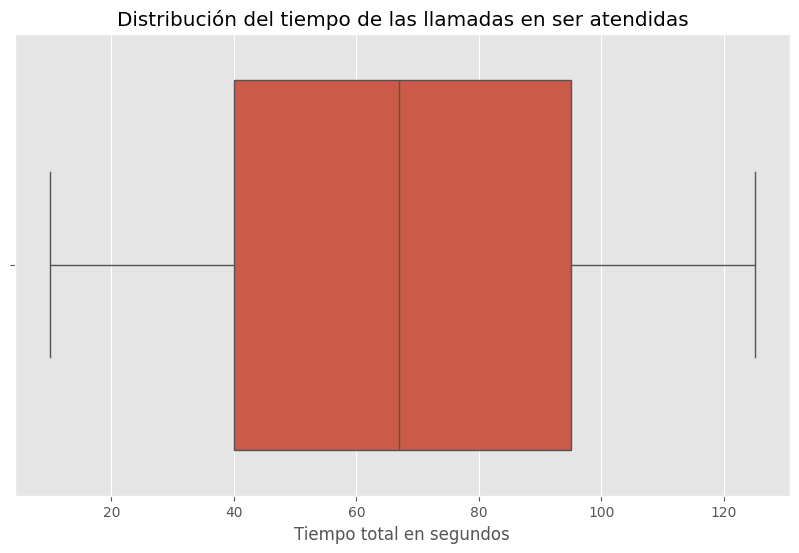

In [19]:
# estilo del grafico
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, x='tiempo_respuesta')
    # formato 
    plt.title('Distribución del tiempo de las llamadas en ser atendidas')
    plt.xlabel('Tiempo total en segundos')
    
    plt.show()

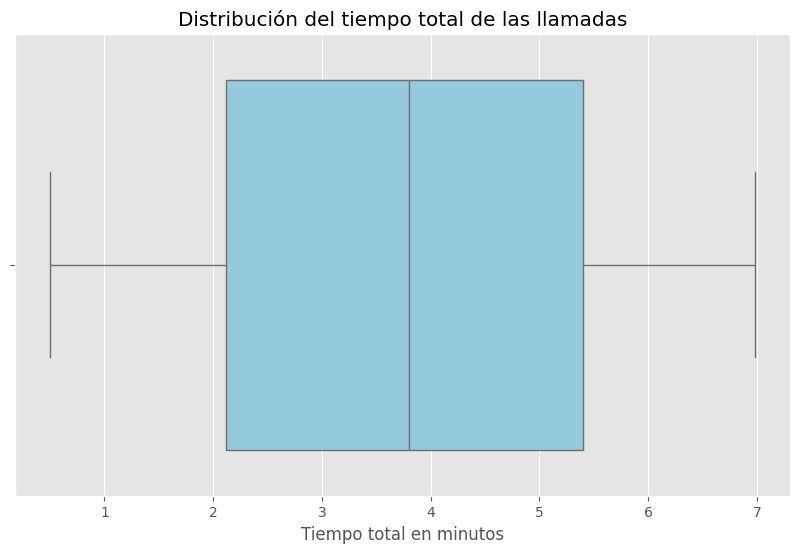

In [20]:
# distribucion duracion de las llamadas en minutos
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, 
                x='duracion_llamada_min', 
                color='skyblue')
    # formato 
    plt.title('Distribución del tiempo total de las llamadas')
    plt.xlabel('Tiempo total en minutos')
    
    plt.show()

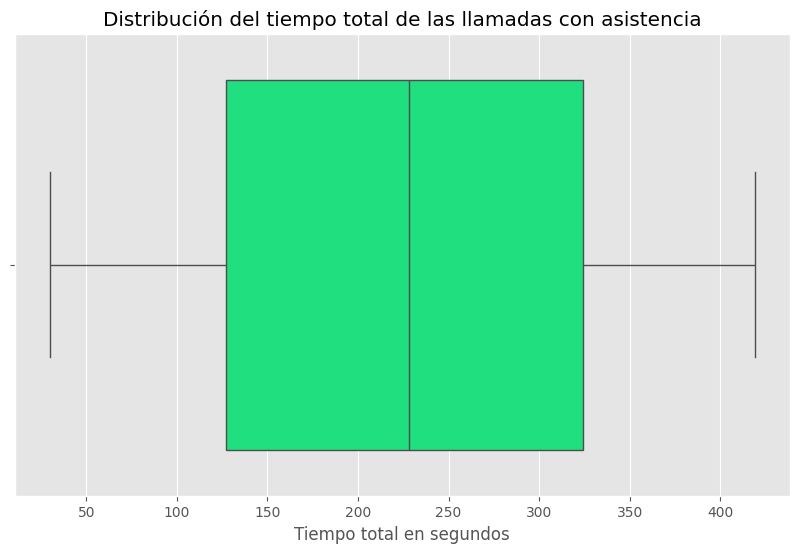

In [21]:
# distribucion duracion de las llamadas en segundos
with plt.style.context('ggplot'):
    # crear bloxplot
    plt.figure(figsize=(10,6))
    sns.boxplot(data=servicio, 
                x='duracion_llamada_asistida', 
                color='springgreen')
    # formato 
    plt.title('Distribución del tiempo total de las llamadas con asistencia')
    plt.xlabel('Tiempo total en segundos')
    
    plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
No se encontrarons valores atipicos dentro de la base de datos
</span>

## Análisis solicitado: 

1. Eficiencia en la atención:
* ¿Cuál es el tiempo promedio de respuesta de los asesores?
* ¿Existe alguna variación en el tiempo de respuesta según el área?

2. Duración de las llamadas:
* ¿Cuál es la distribución de la duración total de las llamadas?
* ¿Qué porcentaje del tiempo total de espera representa el tiempo asistido por un asesor?

3. Satisfacción del cliente:

* ¿Cuál es el promedio y la distribución del índice de satisfacción?
* ¿Hay una relación entre la duración de la llamada y la satisfacción del cliente?

4. Carga de trabajo y eficiencia

* ¿Cuál es el número total de llamadas atendidas por cada asesor? (Distribución de llamadas por asesor - gráfico de barras)
* ¿Cuál es el tiempo promedio de respuesta por asesor? (Boxplot o gráfico de líneas para comparar la rapidez de respuesta)
* ¿Qué asesores tienen la mayor duración promedio de llamadas? (Comparación de duración total vs. duración asistida por asesor - gráfico de barras o scatter plot)
* ¿Qué asesores tienen el índice de satisfacción más bajo y más alto? (Gráfico de barras ordenado o heatmap)
* ¿Hay áreas con un indice de satisfacción bajo?
* ¿Hay áreas con un indice de satisfacción alto?

### 1. Eficiencia en la atención

#### a) ¿Cuál es el tiempo promedio de respuesta de los asesores?

In [22]:
# calcular el tiempo promedio de respuesta de los asesores
promedio_respuesta = servicio['tiempo_respuesta'].mean()
# redondear valor
promedio_respuesta = promedio_respuesta.round(2)
# imprimir el tiempo
print(f"El tiempo promedio de respuesta de los asesores es de: {promedio_respuesta} segundos") 

El tiempo promedio de respuesta de los asesores es de: 66.68 segundos


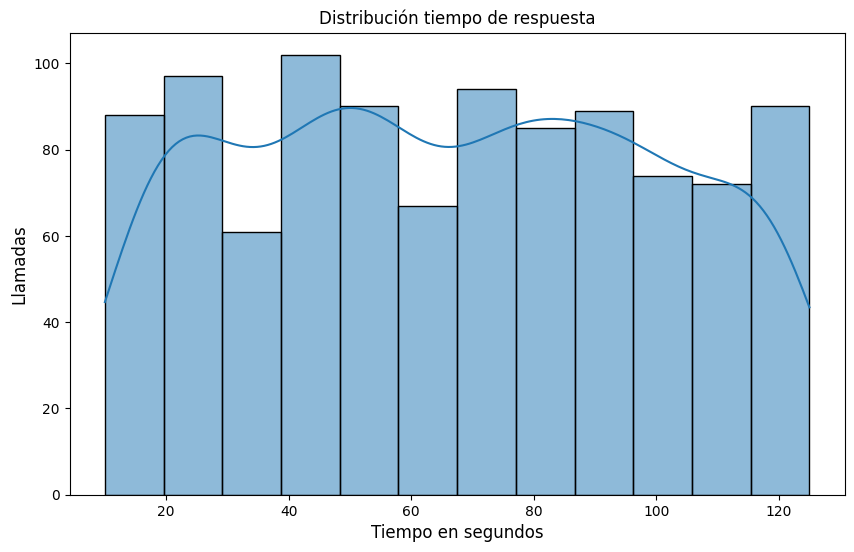

In [23]:
# histograma de distribucion de tiempo
plt.figure(figsize=(10,6))

sns.histplot(data=servicio,
             x='tiempo_respuesta', 
              binwidth=10, 
             bins=20,
             kde=True)
plt.title('Distribución tiempo de respuesta', fontsize=12)
plt.xlabel('Tiempo en segundos', fontsize=12)
plt.ylabel('Llamadas', fontsize=12)
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
Al analizar el tiempo promedio de respuesta de los asesores se encontro que es de 66.68 segundos, ademas se agrego un histograma para observar la distribución de tiempo de respuesta.
</span>

#### b) ¿Existe alguna variación en el tiempo de respuesta según el área?

In [24]:
# variacion en el tiempo de respuesta segun el area 
area_tiempo = servicio.groupby('area')['tiempo_respuesta'].sum().reset_index(name='tiempo_por_area')
# ordenar los datos de mayor a menor 
area_tiempo = area_tiempo.sort_values(by='tiempo_por_area')
# mostrar tabla
area_tiempo

,area,tiempo_por_area
2,reclamos,12781
1,intercambios,13265
0,cancelaciones,13480
3,ventas,27757


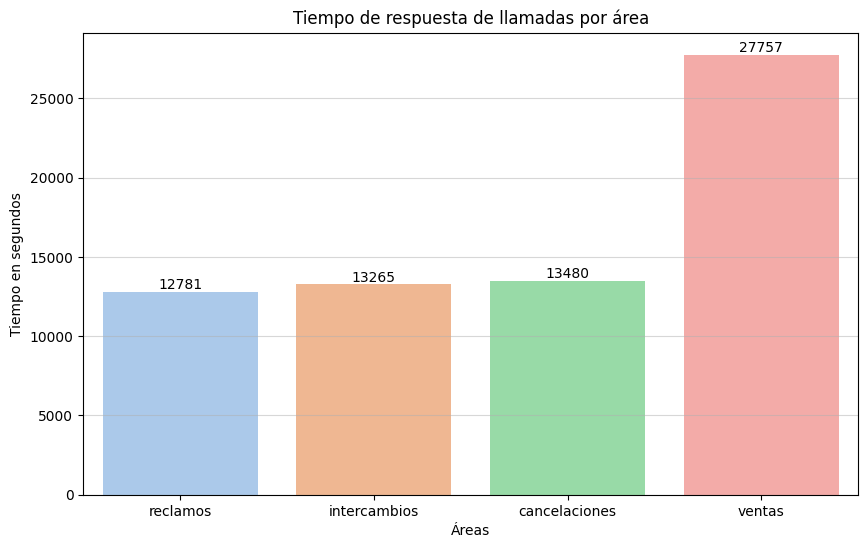

In [25]:
# grafica del tiempo de respuesta por area
with sns.color_palette("pastel"):
    plt.figure(figsize=(10,6))

    ax = sns.barplot(area_tiempo,
                    x='area', 
                    y='tiempo_por_area',
                    hue='area', 
                    estimator='sum')
    for container in ax.containers:
        ax.bar_label(container, fontsize=10)

plt.title('Tiempo de respuesta de llamadas por área')
plt.xlabel('Áreas')
plt.ylabel('Tiempo en segundos')
plt.grid(axis='y', alpha=0.5)
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
En la siguiente grafica se muestra que el área con mayor tiempo de respuesta es "Ventas" seguido de "Cancelaciones" e "Intercambios", por último se encuentra el área de "Reclamos" lo que puede indicar que los clientes estan satisfechos con los productos.
</span>

### 2. Duración de las llamadas

#### a) ¿Cuál es la distribución de la duración total de las llamadas?

In [26]:
# calcular el tiempo de duracion de las llamadas
llamada_total = servicio['duracion_llamada_min'].mean()
# redondear valor
llamada_total = llamada_total.round(2)
# imprimir el tiempo
print(f"El tiempo promedio de respuesta de los asesores es de: {llamada_total} minutos") 

El tiempo promedio de respuesta de los asesores es de: 3.73 minutos


#### b) ¿Qué porcentaje del tiempo total de la llamada es asistido por un asesor?

In [27]:
# calcular la diferencia de tiempos entre la duracion de la llamada y el tiempo de respuesta 
servicio['tiempo_real_atendido'] = servicio['duracion_llamada_asistida'] - servicio['tiempo_respuesta']

In [28]:
# porcentaje del tiempo total de espera representa el tiempo asistido por un asesor
servicio['%_tiempo'] = (servicio['duracion_llamada_asistida'] * 100) / (servicio['duracion_llamada_asistida'] + servicio['tiempo_respuesta'])
# redondear los resultados 
servicio['%_tiempo'] = servicio['%_tiempo'].round(2)
# mostrar resultados
servicio

,id_llamada,fecha,asesor,area,respondio,resuelto,tiempo_respuesta,duracion_llamada_min,duracion_llamada_asistida,indice_satisfaccion,dias,tiempo_real_atendido,%_tiempo
0,ID0001,2023-03-22,juan d.,ventas,si,1,109,2.38,143,2,22,34,56.75
1,ID0002,2023-03-17,marcelo f.,reclamos,si,0,70,4.03,242,3,17,172,77.56
2,ID0003,2023-03-18,leandro c.,ventas,si,1,10,2.18,131,3,18,121,92.91
3,ID0004,2023-03-09,leandro c.,ventas,si,1,53,0.62,37,2,9,-16,41.11
4,ID0007,2023-03-01,marina z.,cancelaciones,si,1,24,3.67,220,2,1,196,90.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,ID1764,2023-03-06,ana s.,ventas,si,1,92,6.00,360,4,6,268,79.65
1005,ID1765,2023-03-05,ana s.,ventas,si,1,95,5.00,300,3,5,205,75.95
1006,ID1766,2023-03-20,gustavo m.,ventas,si,1,49,1.97,118,5,20,69,70.66
1007,ID1770,2023-03-04,ana s.,cancelaciones,si,1,78,1.03,62,4,4,-16,44.29


In [29]:
# promedio de porcentaje de tiempo total 
promedio_tiempo = servicio['%_tiempo'].mean()
# redondear el valor 
promedio_tiempo = promedio_tiempo.round(2)
# mostrar porcentaje
print(f'El porcentaje promedio de espera es: {promedio_tiempo}%')

El porcentaje promedio de espera es: 73.73%


<span style="color:blue; font-weight:bold; font-size:20px">
Para calcular el porcentaje de tiempo promedio de espera se agrego una columna nueva a partir del tiempo de duracion de la llamada asistida y el tiempo de respuesta, se obtuvo que el promedio es de 73.73% del tiempo total de la llamada en que las personas esperan para ser atendidos, este valor es muy alto ya que solo un 27% del total de la llamada la dedican a atender el motivo.
</span>

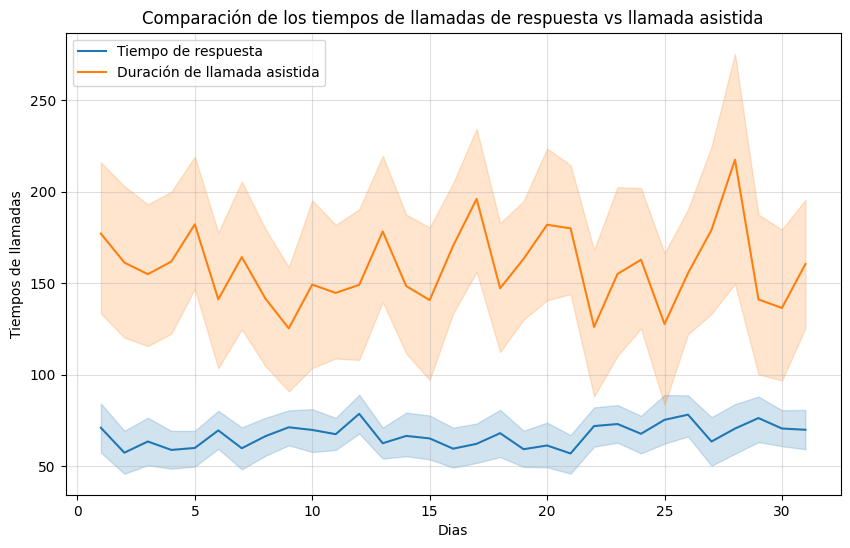

In [30]:
# grafica comparativa tiempos de llamadas
plt.figure(figsize=(10,6))
# grafico
sns.lineplot(data=servicio, 
             x='dias', 
             y='tiempo_respuesta',
             label='Tiempo de respuesta')
sns.lineplot(data=servicio, 
             x='dias', 
             y='tiempo_real_atendido', 
             label='Duración de llamada asistida')
# formato grafico 
plt.title('Comparación de los tiempos de llamadas de respuesta vs llamada asistida')
plt.xlabel('Dias')
plt.ylabel('Tiempos de llamadas')
plt.grid(axis='both', alpha=0.4)
plt.legend()
# mostrar grafico
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
El siguiente grafico muestra una comparacion entre los tiempos de respuesta y la duracion de las llamadas en la cual se puede observar que el tiempo de respuesta es inferior a los 100 segundos (1 minuto 40 segundos - 50 segundos), mientras que la duracion de llamadas va desde los 150 segundos hasta los 230 segundos aproximadamente (2:30 - 3:40 minutos)
</span>

### 3. Satisfacción del cliente

#### a) ¿Cuál es el promedio y la distribución del índice de satisfacción?

In [31]:
# calcular promedio satisfaccion
promedio_satisfaccion = servicio['indice_satisfaccion'].mean()
# redondear valor
promedio_satisfaccion = promedio_satisfaccion.round(2)
# mostrar resultado
print(f'El promedio del indice de satisfacción es: {promedio_satisfaccion} puntos')

El promedio del indice de satisfacción es: 3.4 puntos


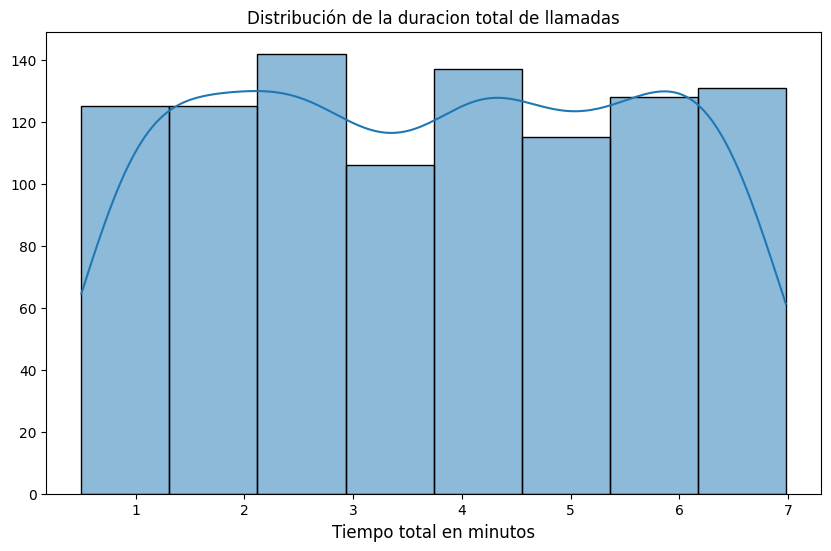

In [32]:
# distribucion de la duracion total de llamadas 
plt.figure(figsize=(10,6))
sns.histplot(data=servicio,
             x='duracion_llamada_min', 
             bins=8,
             kde=True)

plt.title('Distribución de la duracion total de llamadas', fontsize=12)
plt.xlabel('Tiempo total en minutos', fontsize=12)
plt.ylabel('')
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
En el siguiente grafico se observa la distribucion de la duracion total de llamadas en minutos, donde se obtuvo una media de 3.4 
</span>

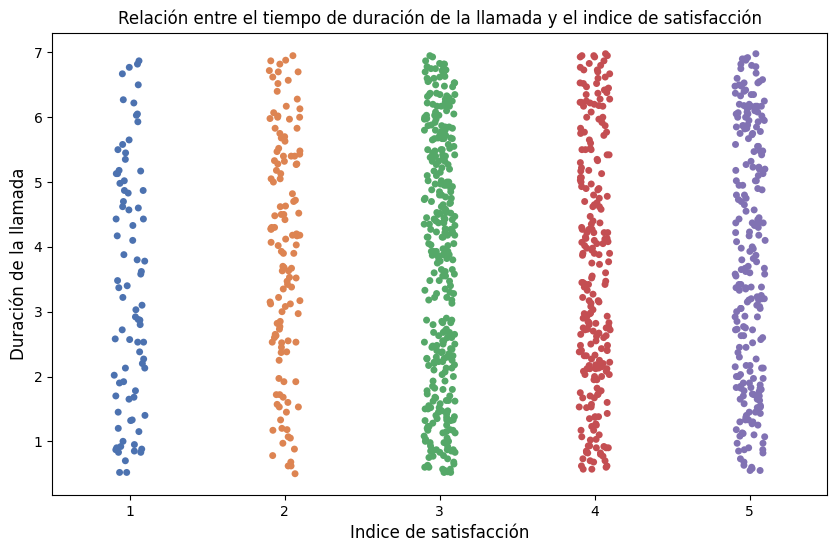

In [33]:
# grafico de la relacion entre llamadas y la satisfaccion 
plt.figure(figsize=(10,6))
# desarrollo grafico
sns.stripplot(data=servicio, 
              x='indice_satisfaccion', 
              y='duracion_llamada_min', 
              hue='indice_satisfaccion', 
              jitter=True,
              palette='deep',
              legend=False)

plt.title('Relación entre el tiempo de duración de la llamada y el indice de satisfacción', fontsize=12)
plt.xlabel('Indice de satisfacción', fontsize=12)
plt.ylabel('Duración de la llamada', fontsize=12)
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
En este grafico de dispersion se visualiza el indice de satisfaccion del cliente entre tiempo de llamadas, con esto se puede confirmar que la satisfaccion del cliente oscila entre 3 y 4 puntos de calificacion
</span>

### 4. Carga de trabajo y eficiencia

#### a) ¿Cuál es el número total de llamadas atendidas por cada asesor?

In [34]:
# numero total de asesores
asesor_unico = servicio['asesor'].nunique()
print(f'Hay un total de {asesor_unico} asesores')

Hay un total de 7 asesores


In [35]:
# mostrar las llamadas atendidas por asesor
asesor_llamadas = servicio.groupby('asesor')['respondio'].count().reset_index(name='total_llamadas_atendidas')
# ordenar de manera ascendente 
asesor_llamadas.sort_values(by='total_llamadas_atendidas', inplace=True)
# mostrar resultados
asesor_llamadas

,asesor,total_llamadas_atendidas
4,marcelo f.,115
0,ana s.,136
1,gustavo m.,137
5,marina z.,148
6,paulo g.,149
3,leandro c.,153
2,juan d.,171


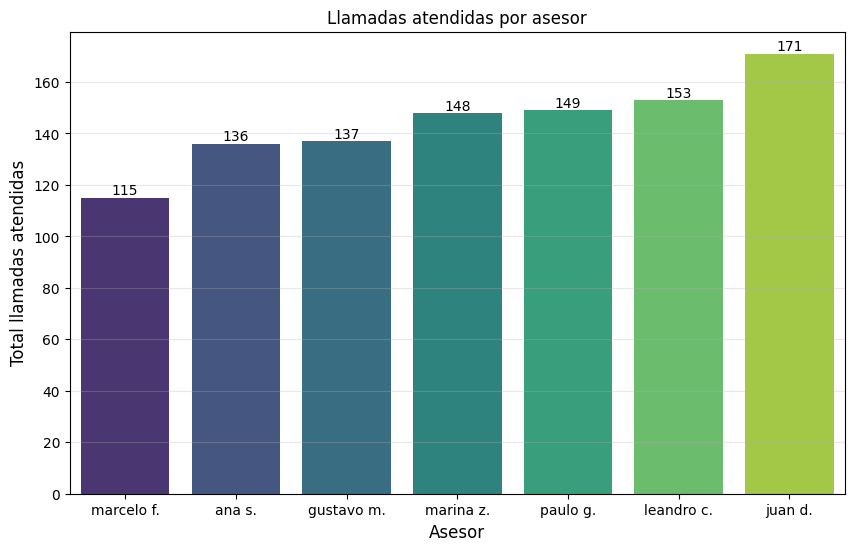

In [36]:
# grafica de llamadas atendidas por un asesor
plt.figure(figsize=(10,6))
ax = sns.barplot(data=asesor_llamadas, 
             x='asesor', 
            y='total_llamadas_atendidas',
            hue='asesor', 
            estimator='sum', 
            palette='viridis')
for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.title('Llamadas atendidas por asesor', fontsize=12)
plt.xlabel('Asesor', fontsize=12 )
plt.ylabel('Total llamadas atendidas', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
En la grafica se observa que el asesor con menos llamadas es Marcelo f. con un total de 115, mientras que Juan d. es el asesor con mayor numero de llamadas cuenta con 171. 
</span>

#### b) ¿Cuál es el tiempo promedio de respuesta por asesor? 

In [37]:
# calcular el tiempo promedio de respuesta por asesor
tiempo_asesor = servicio.groupby('asesor')['tiempo_respuesta'].mean().reset_index(name='tiempo_respuesta')
# convertir a minutos el tiempo_respuesta 
tiempo_asesor['tiempo_respuesta'] = tiempo_asesor['tiempo_respuesta'] / 60

In [38]:
# ordenar los datos
tiempo_asesor.sort_values(by='tiempo_respuesta', inplace=True)
# redondear datos
tiempo_asesor = tiempo_asesor.round(2)
# mostrar resultado
tiempo_asesor

,asesor,tiempo_respuesta
4,marcelo f.,1.01
5,marina z.,1.09
2,juan d.,1.11
3,leandro c.,1.12
6,paulo g.,1.12
0,ana s.,1.14
1,gustavo m.,1.17


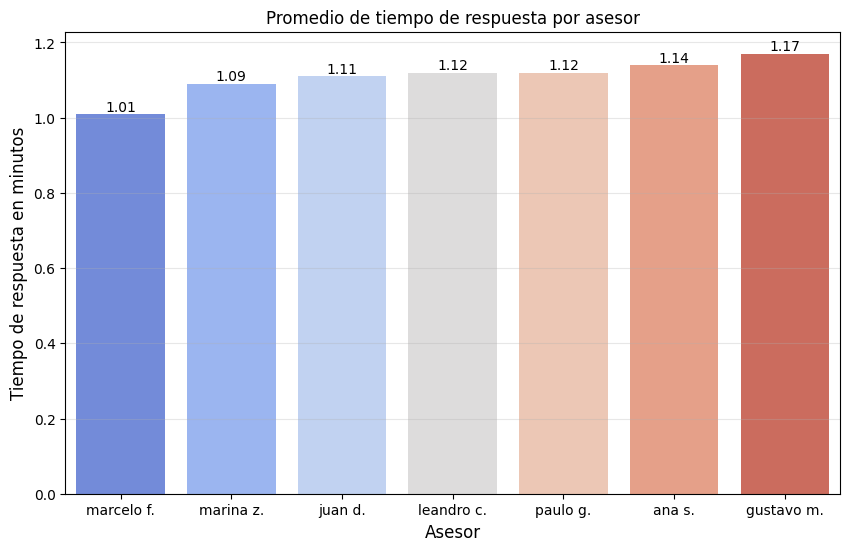

In [39]:
# grafica de llamadas atendidas por un asesor
plt.figure(figsize=(10,6))
ax = sns.barplot(data=tiempo_asesor, 
             x='asesor', 
             y='tiempo_respuesta',
            hue='asesor', 
            estimator='mean', 
            palette='coolwarm')
for container in ax.containers:
     ax.bar_label(container, fontsize=10)

plt.title('Promedio de tiempo de respuesta por asesor', fontsize=12)
plt.xlabel('Asesor', fontsize=12 )
plt.ylabel('Tiempo de respuesta en minutos', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
En la siguiente grafica se muestra el promedio de tiempo de respuesta por asesor, si lo comparamos con el grafico pasado se obtiene que Marcelo F. cuenta con el menor tiempo promedio de 1 minuto, mientras que Gustavo M. tarda en promedio 1 minuto y 17 segundos lo que lo posiciona como el asesor con mayor tiempo de respuesta, sin embargo, los demas asesores cuentan con un promedio similar entre 1 minuto y 9 a 14 segundos, este tiempo es relativamente bajo, apenas supera el minuto de espera. 
</span>

#### c) ¿Qué asesores tienen la mayor duración promedio de llamadas? 

In [40]:
# calcular el promedio de la duracion de llamada 
llamada_promedio = servicio.groupby('asesor')['duracion_llamada_min'].mean().reset_index(name='tiempo_llamada')
# ordenar de menor a mayor 
llamada_promedio.sort_values(by='tiempo_llamada', inplace=True)
# redondear valores 
llamada_promedio = llamada_promedio.round(2)
# mostrar resultados
llamada_promedio

,asesor,tiempo_llamada
1,gustavo m.,3.54
2,juan d.,3.66
0,ana s.,3.67
5,marina z.,3.78
3,leandro c.,3.81
4,marcelo f.,3.83
6,paulo g.,3.84


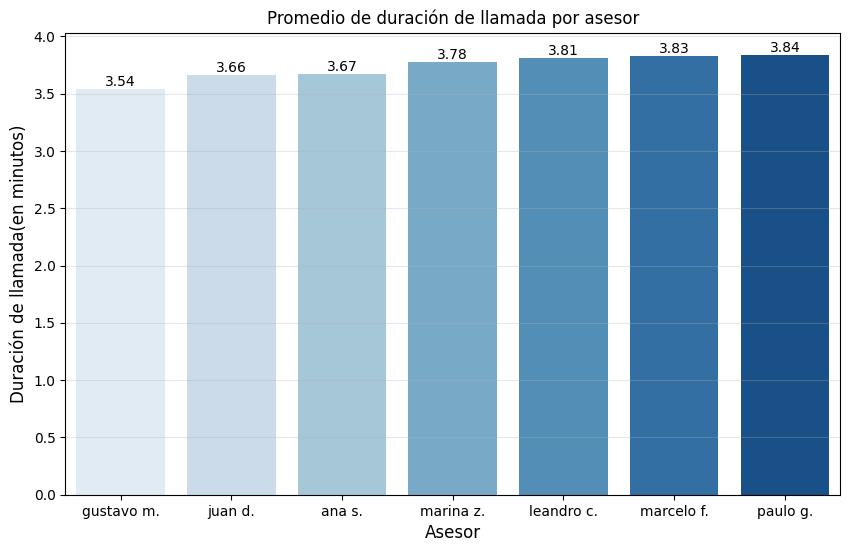

In [41]:
# grafica de llamadas atendidas por un asesor
plt.figure(figsize=(10,6))
ax = sns.barplot(data=llamada_promedio, 
             x='asesor', 
             y='tiempo_llamada',
            hue='asesor', 
            estimator='mean', 
            palette='Blues')
for container in ax.containers:
     ax.bar_label(container, fontsize=10)

plt.title('Promedio de duración de llamada por asesor', fontsize=12)
plt.xlabel('Asesor', fontsize=12 )
plt.ylabel('Duración de llamada(en minutos)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
En el grafico de barras se muestra el promedio de duracion de llamada por asesor en donde Gustavo M. es quien presenta el menor promedio de duracion de llamadas, estos resultados coinciden con la grafica pasada y da un indicio que Gustavo podria no tener un buen desempeño. En cuanto a los demas asesores se encuentran en el mismo tiempo promedio de 3 minutos y lo que varia son los segundos. Aqui Paulo G. es el asesor con mayor tiempo promedio de duracion con seguido de Marcelo F. y Leandro C.
</span>

#### d) ¿Existe una relación entre la duración de la llamada y el índice de satisfacción por asesor?

In [42]:
satisfaccion_asesor = servicio.pivot_table(index='asesor', 
                                           columns='indice_satisfaccion', 
                                           values='duracion_llamada_min', 
                                           aggfunc='mean')
satisfaccion_asesor

indice_satisfaccion,1,2,3,4,5
asesor,,,,,
ana s.,3.250909,3.802500,3.853448,3.377813,3.736522
gustavo m.,2.732000,3.477692,3.801800,3.326471,3.498857
juan d.,3.240345,3.967111,3.653800,3.412273,3.813600
leandro c.,3.356923,4.051053,3.794348,3.920000,3.726389
marcelo f.,3.365833,3.140000,3.769583,3.902381,4.153103
marina z.,3.792857,3.835556,3.626207,3.742500,4.052895
paulo g.,4.476667,4.383500,3.861489,3.574839,3.661333


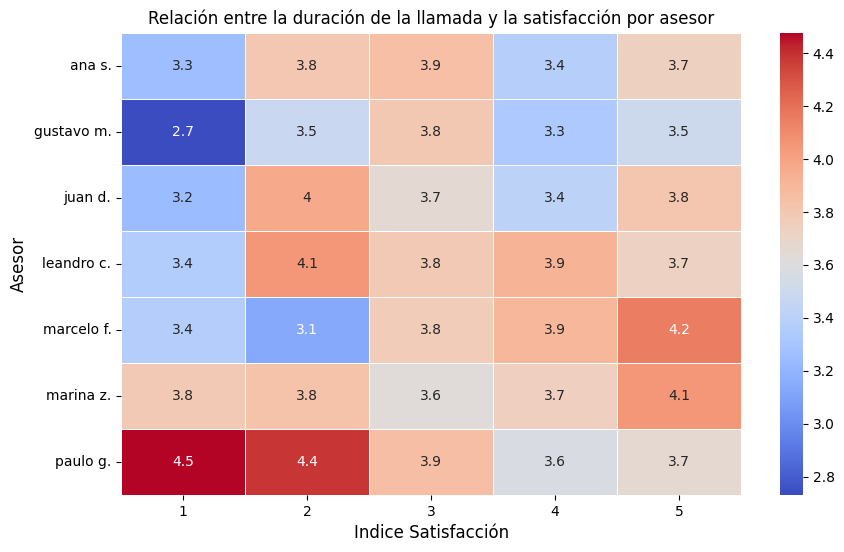

In [43]:
# mapa de calor 
plt.figure(figsize=(10,6))

sns.heatmap(satisfaccion_asesor,
            annot=True, 
            linewidth = .5, 
            cmap='coolwarm')

plt.title('Relación entre la duración de la llamada y la satisfacción por asesor', fontsize=12)
plt.xlabel('Indice Satisfacción', fontsize=12)
plt.ylabel('Asesor', fontsize=12)

plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
En el mapa de calor se observa la relacion entre la duracion de llamada y la satisfaccion por asesor, donde se observa que Paulo G. tiene las llamadas mas largas y los indices de satisfaccion mas altos, por otra parte se observa qye Gustavo M. tiene las llamadas mas costas y un indice de satisfaccion bajo. En cuanto a Ana, Juan y Marina se observa una satisfaccion relativamente estable. Sin embargo, no se observa una relacion lineal clara entre la duracion y la satisfaccion, aunque Paulo tiene llamadas mas largas y un mejor indice no se muestra la misma tendencia. Lo que podria indicar que existen otros factores que influyen en la satisfaccion del cliente. 
</span>

#### e) ¿Qué asesores tienen el índice de satisfacción más bajo y más alto?

In [44]:
# mostrar el promedio de indice de satisfaccion
print(f'El promedio del indice de satisfacción es: {promedio_satisfaccion} puntos')

El promedio del indice de satisfacción es: 3.4 puntos


In [45]:
# calcular el indice por promedio
indice_asesor = servicio.groupby('asesor')['indice_satisfaccion'].mean().reset_index(name='satisfaccion_promedio')
# ordenar de mayor a menor
indice_asesor.sort_values(by='satisfaccion_promedio', ascending=False, inplace=True)
# redondear valores 
indice_asesor = indice_asesor.round(1)

In [46]:
# clasificar en alto y bajo
indice_asesor['clasificación'] = indice_asesor['satisfaccion_promedio'].apply(lambda x: 'Alto' if x > promedio_satisfaccion else 'Bajo')
# mostrar resultado
indice_asesor

,asesor,satisfaccion_promedio,clasificación
5,marina z.,3.6,Alto
6,paulo g.,3.6,Alto
4,marcelo f.,3.6,Alto
1,gustavo m.,3.6,Alto
3,leandro c.,3.4,Bajo
0,ana s.,3.3,Bajo
2,juan d.,2.8,Bajo


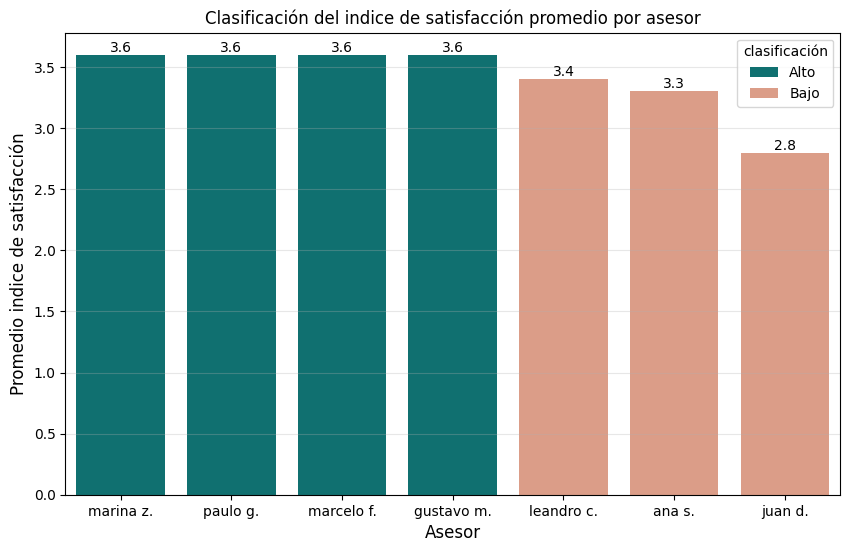

In [47]:
# graficar los asesores por clasificacion
plt.figure(figsize=(10,6))

ax = sns.barplot(data=indice_asesor, 
            x='asesor', 
            y='satisfaccion_promedio', 
            hue='clasificación',  
            estimator='mean', 
            palette={'Alto':'teal','Bajo':'darksalmon'})
for contenedor in ax.containers:
    ax.bar_label(contenedor, fontsize=10)

plt.title('Clasificación del indice de satisfacción promedio por asesor', fontsize=12)
plt.xlabel('Asesor', fontsize=12)
plt.ylabel('Promedio indice de satisfacción', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
Para segmentar a los asesores, se consideró el promedio del índice general de satisfacción, que resultó ser 3.4. Con base en este criterio, se identificaron cuatro asesores con clasificación "Alto": Marina, Paulo, Marcelo y Gustavo. Por otro lado, los asesores clasificados como "Bajo" son Leandro, Ana y Juan.

Al analizar la tabla, se observa que las diferencias en los índices de satisfacción entre la mayoría de los asesores son mínimas, oscilando entre 3.3 y 3.6. Sin embargo, Juan destaca con un índice significativamente menor, de 2.8 puntos.
</span>

#### f) ¿Hay áreas con un indice de satisfacción bajo?

In [48]:
# mostrar indice de satisfaccion promedio
print(f'El promedio del indice de satisfacción es: {promedio_satisfaccion} puntos')

El promedio del indice de satisfacción es: 3.4 puntos


In [49]:
# calcular el promedio de satisfaccion por area
satisfaccion_area = servicio.groupby('area')['indice_satisfaccion'].mean().reset_index(name='promedio_area')
# redondear valores
satisfaccion_area = satisfaccion_area.round(2)

In [50]:
# segmentar los datos en altos o bajos segun el promedio del indice de satisfaccion
satisfaccion_area['clasificación'] = satisfaccion_area['promedio_area'].apply(lambda x: "Alto" if x > promedio_satisfaccion else "Bajo")
# mostrar resultados
satisfaccion_area

,area,promedio_area,clasificación
0,cancelaciones,3.44,Alto
1,intercambios,3.41,Alto
2,reclamos,3.40,Bajo
3,ventas,3.38,Bajo


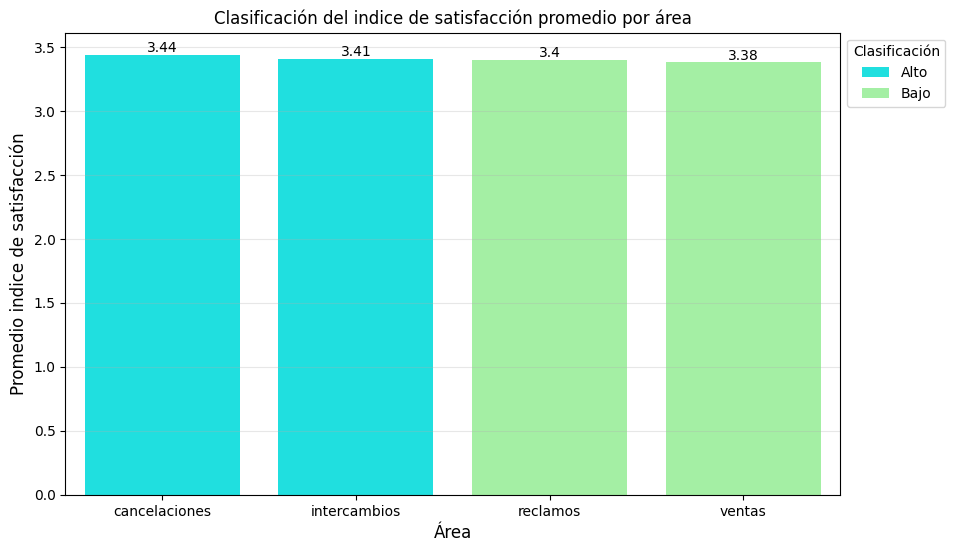

In [51]:
plt.figure(figsize=(10,6))

ax = sns.barplot(data=satisfaccion_area, 
            x='area', 
            y='promedio_area', 
            hue='clasificación',  
            estimator='mean', 
            palette={'Alto':'cyan','Bajo':'palegreen'})
for contenedor in ax.containers:
    ax.bar_label(contenedor, fontsize=10)

plt.title('Clasificación del indice de satisfacción promedio por área', fontsize=12)
plt.xlabel('Área', fontsize=12)
plt.ylabel('Promedio indice de satisfacción', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Clasificación', bbox_to_anchor=(1,1))

plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
En el siguiente gráfico se analizó el índice de satisfacción por área, clasificándolo en dos categorías: 'Alto' y 'Bajo'. Se identificó que las áreas de 'Cancelación' e 'Intercambio' presentan un índice alto, mientras que 'Reclamos' y 'Ventas' tienen un índice bajo. Sin embargo, la diferencia entre los índices no es significativa, ya que varía en un rango estrecho de 3.38 a 3.44. Esto sugiere que, en general, el nivel de satisfacción de los clientes se mantiene en un punto medio en las cuatro áreas analizadas.
</span>

#### g)  ¿Qué asesor tiene mayor número de llamadas resueltas por área?

In [52]:
# construir una pivot table para mostrar el total de llamadas resueltas por operador
pivot_area = servicio.pivot_table(index='asesor', 
                                  columns='area', 
                                  values='resuelto', 
                                  aggfunc='sum')

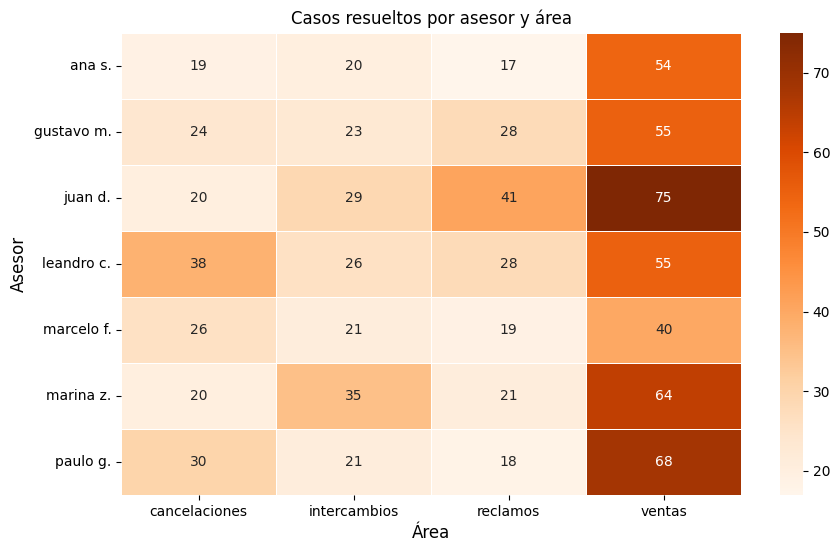

In [53]:
# heatmap de llamadas resueltas por asesor
plt.figure(figsize=(10,6))

sns.heatmap(pivot_area,
            cmap='Oranges',
            annot=True, 
            linewidth=.5)

plt.title('Casos resueltos por asesor y área',fontsize=12)
plt.xlabel('Área', fontsize=12)
plt.ylabel('Asesor',fontsize=12)
plt.show()

<span style="color:blue; font-weight:bold; font-size:20px">
El área con mayor cantidad de casos resueltos es 'Ventas', ya que se observa una fuerte tendencia de resolución por parte de todos los asesores. En contraste, 'Intercambios' es el área con el menor número de casos resueltos, seguida por 'Reclamos' en segundo lugar y 'Cancelaciones' en tercer lugar.
</span>

In [54]:
# agregar columna con total de llamadas y ordenarlo descendentemente 
pivot_area['total_llamadas'] = pivot_area.sum(axis=1)
# ordenar los resultados 
pivot_area.sort_values(by='total_llamadas', ascending=False, inplace=True)
# mostrar resultados 
pivot_area

area,cancelaciones,intercambios,reclamos,ventas,total_llamadas
asesor,,,,,
juan d.,20,29,41,75,165
leandro c.,38,26,28,55,147
marina z.,20,35,21,64,140
paulo g.,30,21,18,68,137
gustavo m.,24,23,28,55,130
ana s.,19,20,17,54,110
marcelo f.,26,21,19,40,106


In [ ]:
# Promedio de llamadas totales 
promedio_llamada_area = pivot_area['total_llamadas'].mean()
# cambiar tipo de dato del resultado 
promedio_llamada_area = promedio_llamada_area.astype('int')
# mostrar resultado
print(f'El promedio de llamadas resueltas es: {promedio_llamada_area} llamadas')

El promedio de llamadas resueltas es: 133 llamadas


In [56]:
pivot_area['clasificación'] = pivot_area['total_llamadas'].apply(lambda x: "Muy alto" if x > 164 else ("Alto" if x > promedio_llamada_area else "Bajo"))

pivot_area

area,cancelaciones,intercambios,reclamos,ventas,total_llamadas,clasificación
asesor,,,,,,
juan d.,20,29,41,75,165,Muy alto
leandro c.,38,26,28,55,147,Alto
marina z.,20,35,21,64,140,Alto
paulo g.,30,21,18,68,137,Alto
gustavo m.,24,23,28,55,130,Bajo
ana s.,19,20,17,54,110,Bajo
marcelo f.,26,21,19,40,106,Bajo


<span style="color:blue; font-weight:bold; font-size:20px">
Las tablas muestran el total de llamadas resueltas por asesor, destacando a Juan D. como el que ha gestionado la mayor cantidad, con 165 llamadas. Sin embargo, al analizar los gráficos anteriores, se observa que también es el asesor con un índice bajo de satisfacción. Esto podría sugerir que el alto volumen de llamadas afecta su actitud hacia los clientes.

Por otro lado, Marcelo F. es el asesor con el menor número de llamadas resueltas, con un total de 106. Además, en esta tabla se segmentaron los asesores según el promedio de llamadas resueltas (133), lo que permitió identificar un asesor con un volumen de llamadas muy alto, tres con un número elevado y tres con un número bajo.
</span>

## Conclusiones

<span style="color:blue; font-weight:bold; font-size:20px">
El análisis realizado permitió identificar tendencias clave en la gestión de llamadas y la satisfacción del cliente. Se observó que el área con mayor tiempo de respuesta es "Ventas", mientras que "Reclamos" tiene el menor, lo que podría sugerir que los clientes están más satisfechos con los productos. Además, el tiempo de espera representa en promedio el 73.73% de la duración total de la llamada, lo que indica una oportunidad de mejora en la eficiencia del servicio.

En cuanto a los asesores, Juan D. es quien resuelve más llamadas (165), pero también presenta un índice de satisfacción bajo, lo que sugiere que un alto volumen de trabajo podría estar afectando su desempeño. Por otro lado, Marcelo F., con la menor cantidad de llamadas (106), tiene un tiempo de respuesta más corto. Gustavo M. destaca por tener el menor tiempo de duración de llamadas, lo que, en conjunto con su tiempo de respuesta más alto, podría indicar problemas en la calidad de atención.

Finalmente, aunque las diferencias en los índices de satisfacción por área y asesor no son significativas, estos hallazgos proporcionan información valiosa para optimizar tiempos de espera y mejorar la experiencia del cliente.
</span>